## For visualization, we will use matplotlib and seaborn
* [matplotlib](https://matplotlib.org/stable/plot_types/index.html) covers basic graphs
* [seaborn](https://seaborn.pydata.org/examples/index.html) contains advanced graphs and can make use of pandas's DataFrame

In [1]:
# !pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

## Load psoas dataset as example

In [3]:
data = pd.read_excel('3011979_datasets.xlsx', sheet_name = 'psoas_strength', header = 0, index_col = 0)
data.head()

,Sex,Age,Ht,Wt,Rt/Lt,"Peak force, First (dominant)","Peak force, Second (dominant)","Duration/secs, First (dominant)","Duration/secs, Second (dominant)","Peak force, First (non-dominant)",...,"Psoas area, Rt","Psoas area, Lt","Psoas thickness, Rt","Psoas thickness, Lt","Psoas width, Rt","Psoas width, Lt","% fat, Rt","% fat, Lt",corridor length,anterior corridor
PatientID,,,,,,,,,,,,,,,,,,,,,
N001,M,55.0,1.70,74.0,Rt,18.5,21.9,4.6,6.6,14.6,...,18.987671,21.209954,4.912941,5.082353,5.336471,5.675294,4.802225,5.182677,0.882099,0.564706
N002,F,65.0,1.60,72.0,Rt,5.5,5.0,3.8,5.2,6.2,...,9.578674,10.210007,3.436490,2.854503,3.796767,4.960739,7.677740,14.800562,2.234000,-1.357968
N003,F,77.0,1.56,63.0,Rt,3.4,4.5,3.8,6.0,6.1,...,8.055383,9.994520,4.677494,4.621810,2.477958,3.368910,15.121444,22.372338,1.781250,0.974478
N004,M,57.0,1.60,68.0,Lt,7.5,14.0,5.6,4.0,11.1,...,18.072960,17.744915,4.613466,5.112219,5.336658,4.862843,6.362986,4.940156,1.539080,0.299252
N005,M,72.0,1.72,70.0,Lt,22.1,21.0,6.0,5.0,17.8,...,11.160336,13.229923,4.393204,4.563107,3.495146,4.296117,15.132093,11.006068,3.132949,-0.533981


## Visualization code template

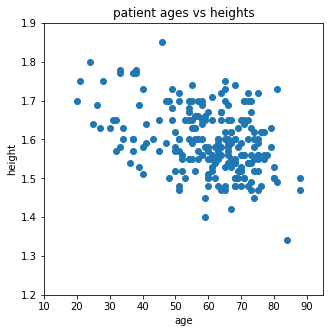

In [13]:
plt.figure(figsize = (5, 5))

plt.scatter(data['Age'], data['Ht'])

plt.xlabel('age')
plt.ylabel('height')
plt.title('patient ages vs heights')

# plt.axis([15, 95, 1.3, 1.9])
plt.xlim([10, 95])
plt.ylim([1.2, 1.9])

# plt.savefig('figure.eps', dpi = 70)
# plt.savefig('figure.svg', dpi = 70)
plt.show()

## Multiple graphs can be placed on the same figure, with automatic coloring
Use **label** parameter and **legend()** to distinguish plots 

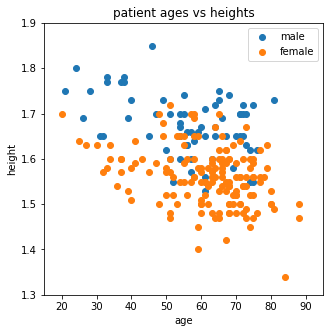

In [19]:
plt.figure(figsize = (5, 5))

plt.scatter(data.loc[data['Sex'] == 'M', 'Age'], data.loc[data['Sex'] == 'M', 'Ht'], label = 'male')
plt.scatter(data.loc[data['Sex'] == 'F', 'Age'], data.loc[data['Sex'] == 'F', 'Ht'], label = 'female')

plt.xlabel('age')
plt.ylabel('height')
plt.title('patient ages vs heights')
plt.axis([15, 95, 1.3, 1.9])
plt.legend()

plt.show()

## Key visualization settings
* Color
* Shape
* Size
* Transparency

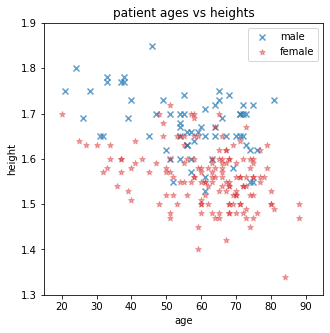

In [24]:
plt.figure(figsize = (5, 5))

plt.scatter(data.loc[data['Sex'] == 'M', 'Age'], data.loc[data['Sex'] == 'M', 'Ht'],
            color = 'tab:blue', marker = 'x', label = 'male', alpha = 0.7)
plt.scatter(data.loc[data['Sex'] == 'F', 'Age'], data.loc[data['Sex'] == 'F', 'Ht'],
            color = 'tab:red', marker = '*', label = 'female', alpha = 0.4)

plt.xlabel('age')
plt.ylabel('height')
plt.title('patient ages vs heights')
plt.axis([15, 95, 1.3, 1.9])
plt.legend()

plt.show()

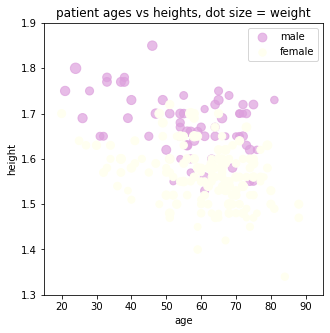

In [27]:
plt.figure(figsize = (5, 5))

plt.scatter(data.loc[data['Sex'] == 'M', 'Age'], data.loc[data['Sex'] == 'M', 'Ht'],
            color = 'plum', label = 'male', alpha = 0.7, s = data.loc[data['Sex'] == 'M', 'Wt'])
plt.scatter(data.loc[data['Sex'] == 'F', 'Age'], data.loc[data['Sex'] == 'F', 'Ht'],
            color = 'ivory', label = 'female', alpha = 1.0, s = data.loc[data['Sex'] == 'F', 'Wt'])

plt.xlabel('age')
plt.ylabel('height')
plt.title('patient ages vs heights, dot size = weight')
plt.axis([15, 95, 1.3, 1.9])
plt.legend()

plt.show()

## Infinite [color choices](https://matplotlib.org/stable/gallery/color/named_colors.html)

# Exercise 1: Use scatter plot to
* Compare age vs height
* Distinguish male and female
* Distinguish those with weight below or above average

In [ ]:
male_avg_wt = data.loc[data['Sex'] == 'M', 'Wt'].mean()
female_avg_wt = data.loc[data['Sex'] == 'F', 'Wt'].mean()

In [ ]:
plt.figure(figsize = (5, 5))

filt = (data['Sex'] == 'M') & (data['Wt'] <= male_avg_wt)
plt.scatter(data.loc[filt, 'Age'], data.loc[filt, 'Ht'], label = 'male, light', color = 'tab:blue', marker = 'x')

filt = (data['Sex'] == 'M') & (data['Wt'] > male_avg_wt)
plt.scatter(data.loc[filt, 'Age'], data.loc[filt, 'Ht'], label = 'male, heavy', color = 'tab:blue', alpha = 0.5)

filt = (data['Sex'] == 'F') & (data['Wt'] <= female_avg_wt)
plt.scatter(data.loc[filt, 'Age'], data.loc[filt, 'Ht'], label = 'female, light', color = 'tab:orange', marker = 'x')

filt = (data['Sex'] == 'F') & (data['Wt'] > female_avg_wt)
plt.scatter(data.loc[filt, 'Age'], data.loc[filt, 'Ht'], label = 'female, heavy', color = 'tab:orange', alpha = 0.5)

plt.xlabel('age'); plt.ylabel('height'); plt.title('age versus height'); plt.legend()

plt.show()

## Histogram

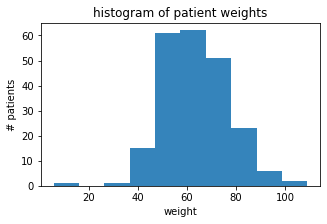

In [28]:
plt.figure(figsize = (5, 3))

plt.hist(data['Wt'], facecolor = 'tab:blue', alpha = 0.9)

plt.xlabel('weight')
plt.ylabel('# patients')
plt.title('histogram of patient weights')

plt.show()

## Overlay histograms
Use bins parameter to control the histogram bins

In [ ]:
plt.figure(figsize = (5, 3))

plt.hist(data.loc[data['Sex'] == 'M', 'Wt'], facecolor = 'tab:orange', alpha = 0.5, label = 'male')
plt.hist(data.loc[data['Sex'] == 'F', 'Wt'], facecolor = 'tab:purple', alpha = 0.5, label = 'female')

plt.xlabel('weight')
plt.ylabel('# patients')
plt.title('histogram of patient weights')
plt.legend()

plt.show()

In [ ]:
list(np.arange(0.1, 1.71, 0.2))

In [ ]:
plt.figure(figsize = (5, 3))

plt.hist(data.loc[data['Sex'] == 'M', 'Wt'], bins = np.arange(10, 111, 5), 
         facecolor = 'tab:orange', alpha = 0.5, label = 'male')
plt.hist(data.loc[data['Sex'] == 'F', 'Wt'], bins = np.arange(10, 111, 5), 
         facecolor = 'tab:purple', alpha = 0.5, label = 'female')

plt.xlabel('weight')
plt.ylabel('# patients')
plt.title('histogram of patient weights')
plt.legend()

plt.show()

## Convert count to density
Set **density** = True

In [ ]:
plt.figure(figsize = (5, 3))

plt.hist(data.loc[data['Sex'] == 'M', 'Wt'], bins = np.arange(10, 111, 5), density = True,
         facecolor = 'tab:orange', alpha = 0.5, label = 'male')
plt.hist(data.loc[data['Sex'] == 'F', 'Wt'], bins = np.arange(10, 111, 5), density = True,
         facecolor = 'tab:purple', alpha = 0.5, label = 'female')

plt.xlabel('weight')
plt.ylabel('# patients')
plt.title('histogram of patient weights')
plt.legend()

plt.show()

## Convert bar to line style
Set **histtype**

In [ ]:
plt.figure(figsize = (5, 3))

plt.hist(data.loc[data['Sex'] == 'M', 'Wt'], bins = np.arange(10, 111, 5), density = True, histtype = 'step',
         edgecolor = 'tab:orange', label = 'male')
plt.hist(data.loc[data['Sex'] == 'F', 'Wt'], bins = np.arange(10, 111, 5), density = True, histtype = 'step',
         edgecolor = 'tab:purple', label = 'female')

plt.xlabel('weight')
plt.ylabel('# patients')
plt.title('histogram of patient weights')
plt.legend()

plt.show()

# Exercise 2: Use histogram to
* Show distribution of % fat in psoas muscle
* Distinguish male and female
* Distinguish % fat in left and right muscle

In [ ]:
plt.figure(figsize = (8, 4))

plt.hist(data.loc[data['Sex'] == 'M', '% fat, Rt'], bins = np.arange(2, 28, 1), density = True,
         facecolor = 'tab:orange', alpha = 0.5, label = 'male, Rt')
plt.hist(data.loc[data['Sex'] == 'M', '% fat, Lt'], bins = np.arange(2, 28, 1), density = True,
         facecolor = 'tab:red', alpha = 0.5, label = 'male, Lt')
plt.hist(data.loc[data['Sex'] == 'F', '% fat, Rt'], bins = np.arange(2, 28, 1), density = True,
         facecolor = 'tab:cyan', alpha = 0.5, label = 'female, Rt')
plt.hist(data.loc[data['Sex'] == 'F', '% fat, Lt'], bins = np.arange(2, 28, 1), density = True,
         facecolor = 'tab:blue', alpha = 0.5, label = 'female, Lt')

plt.xlabel('% fat')
plt.ylabel('fraction of patients')
plt.title('histogram of patient % fat')
plt.legend()

plt.show()

## Box plot & violin plot

c:\python38\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


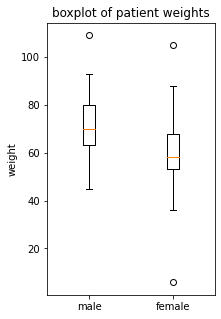

In [29]:
plt.figure(figsize = (3, 5))

plt.boxplot([data.loc[data['Sex'] == 'M', 'Wt'], 
             data.loc[data['Sex'] == 'F', 'Wt']], labels = ('male', 'female'))

plt.ylabel('weight')
plt.title('boxplot of patient weights')

plt.show()

### Tick labels have to be set manually for violin plot 

In [ ]:
plt.figure(figsize = (3, 5))

plt.violinplot([data.loc[data['Sex'] == 'M', 'Wt'], data.loc[data['Sex'] == 'F', 'Wt']], 
               showextrema = True, showmedians = True)

plt.ylabel('weight')
plt.xticks((1, 2), labels = ('male', 'female'))
plt.title('boxplot of patient weights')

plt.show()

## Horizontal boxplot
Set **vert** to False

c:\python38\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


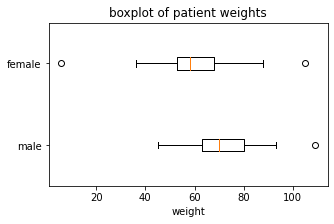

In [30]:
plt.figure(figsize = (5, 3))

plt.boxplot([data.loc[data['Sex'] == 'M', 'Wt'], data.loc[data['Sex'] == 'F', 'Wt']], labels = ('male', 'female'),
            vert = False)

plt.xlabel('weight')
plt.title('boxplot of patient weights')

plt.show()

# Exercise 3: Use boxplot to
* Compare distributions of % fat in psoas muscle
* Distinguish male and female
* Distinguish % fat in left and right muscle
* **Caution**: boxplot cannot handle missing data

In [ ]:
nomissing_data = data.loc[~pd.isna(data).any(axis = 1), :]

In [ ]:
plt.figure(figsize = (3, 5))

plt.boxplot([nomissing_data.loc[nomissing_data['Sex'] == 'M', '% fat, Rt'],
             nomissing_data.loc[nomissing_data['Sex'] == 'M', '% fat, Lt'],
             nomissing_data.loc[nomissing_data['Sex'] == 'F', '% fat, Rt'],
             nomissing_data.loc[nomissing_data['Sex'] == 'F', '% fat, Lt']], 
            labels = ('male, Rt', 'male, Lt', 'female, Rt', 'female, Lt'))

plt.ylabel('weight')
plt.xticks(rotation = 45)
plt.title('boxplot of patient weights')

plt.show()

## Summarize frequency of samples in each group
* pandas's **crosstab**
* Set **margins** = True to include total counts

In [ ]:
pd.crosstab(index = data['Sex'], columns = data['Rt/Lt'], margins = True)

## Computing and visualization correlation structure
Pandas has a built-in correlation function

In [ ]:
corr_struct = data.corr(method = 'pearson')
corr_struct.head()

## matshow for heatmap
* **cmap** control the [coloring palette](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
* **fignum = 1** put the plot onto the predefined figure
* **vmin** and **vmax** control the range of color

In [ ]:
plt.figure(figsize = (10, 9))

plt.matshow(corr_struct, cmap = 'RdBu', fignum = 1, vmin = -1, vmax = 1)

plt.colorbar()
plt.title('Pearson\'s correlation')
plt.yticks(range(corr_struct.shape[1]), corr_struct.columns)

plt.gca().xaxis.tick_bottom()
plt.xticks(range(corr_struct.shape[1]), corr_struct.columns, rotation = 90)

plt.show()

## Let's switch to dialysis data

In [3]:
data = pd.read_excel('3011979_datasets.xlsx', sheet_name = 'dialysis_monitor', header = 0, index_col = 0)
data.head()

,Treatment date,Time,SBP,DBP,MAP,HR,UFR
PatientID,,,,,,,
N001,2018-05-27,14:02:00,162,57,103,75,725
N001,2018-05-27,14:23:00,150,58,81,73,797
N001,2018-05-27,14:56:00,134,52,75,77,725
N001,2018-05-27,16:01:00,135,61,90,76,725
N001,2018-05-27,17:02:00,138,57,85,71,532


## Extract patient N001's visit data

In [4]:
print(np.unique(data.loc[(data.index == 'N001'), 'Treatment date'])[:5])

['2018-05-27T00:00:00.000000000' '2018-05-31T00:00:00.000000000'
 '2018-06-03T00:00:00.000000000' '2018-06-07T00:00:00.000000000'
 '2018-06-10T00:00:00.000000000']


In [6]:
data_p1_visit1 = data.loc[(data.index == 'N001') & (data['Treatment date'] == '2018-05-27'), :].copy()
data_p1_visit1.tail()

,Treatment date,Time,SBP,DBP,MAP,HR,UFR
PatientID,,,,,,,
N001,2018-05-27,17:02:00,138,57,85,71,532
N001,2018-05-27,17:24:00,99,82,92,65,5
N001,2018-05-27,17:25:00,113,46,73,65,5
N001,2018-05-27,18:33:00,155,59,79,67,5
N001,2018-05-27,18:37:00,163,55,85,66,0


## Convert datetime information to real numbers 

## Line plot

In [7]:
data_p1_visit1['Time (hour)'] = [x.hour + x.minute / 60.0 for x in data_p1_visit1['Time']]
data_p1_visit1.head()

,Treatment date,Time,SBP,DBP,MAP,HR,UFR,Time (hour)
PatientID,,,,,,,,
N001,2018-05-27,14:02:00,162,57,103,75,725,14.033333
N001,2018-05-27,14:23:00,150,58,81,73,797,14.383333
N001,2018-05-27,14:56:00,134,52,75,77,725,14.933333
N001,2018-05-27,16:01:00,135,61,90,76,725,16.016667
N001,2018-05-27,17:02:00,138,57,85,71,532,17.033333


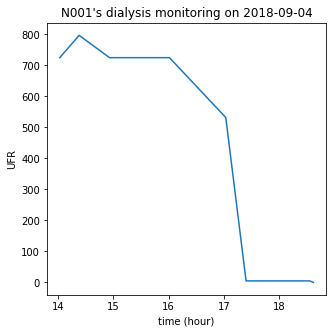

In [8]:
plt.figure(figsize = (5, 5))

plt.plot(data_p1_visit1['Time (hour)'], data_p1_visit1['UFR'])

plt.xlabel('time (hour)')
plt.ylabel('UFR')
plt.title('N001\'s dialysis monitoring on 2018-09-04')

plt.show()

## Running average

C:\Users\Sira\AppData\Local\Temp\ipykernel_14920\2488487714.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Time', 'Treatment date'], dtype='object')
  running_average = data_p1_visit1.rolling(window = 3, center = True).mean()


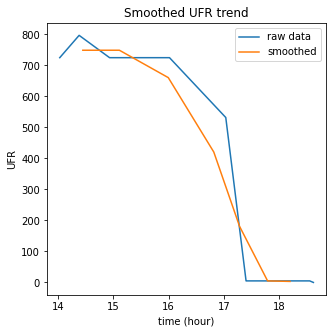

In [9]:
running_average = data_p1_visit1.rolling(window = 3, center = True).mean()

plt.figure(figsize = (5, 5))

plt.plot(data_p1_visit1['Time (hour)'], data_p1_visit1['UFR'], label = 'raw data')
plt.plot(running_average['Time (hour)'], running_average['UFR'], label = 'smoothed')

plt.xlabel('time (hour)')
plt.ylabel('UFR')
plt.title('Smoothed UFR trend')
plt.legend()

plt.show()

## Create multiple panels on the same figure with subplot

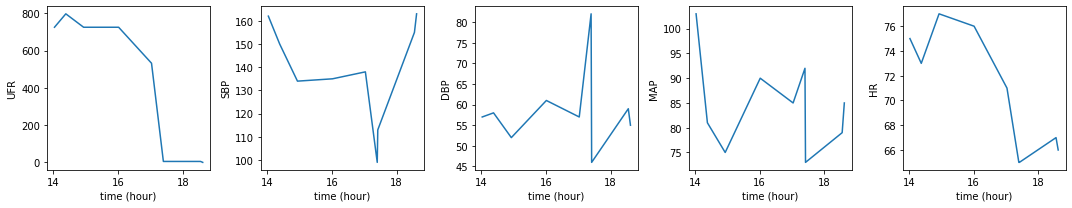

In [10]:
plt.figure(figsize = (15, 3))

plt.subplot(1, 5, 1)
plt.plot(data_p1_visit1['Time (hour)'], data_p1_visit1['UFR'])
plt.xlabel('time (hour)')
plt.ylabel('UFR')

plt.subplot(1, 5, 2)
plt.plot(data_p1_visit1['Time (hour)'], data_p1_visit1['SBP'])
plt.xlabel('time (hour)')
plt.ylabel('SBP')

plt.subplot(1, 5, 3)
plt.plot(data_p1_visit1['Time (hour)'], data_p1_visit1['DBP'])
plt.xlabel('time (hour)')
plt.ylabel('DBP')

plt.subplot(1, 5, 4)
plt.plot(data_p1_visit1['Time (hour)'], data_p1_visit1['MAP'])
plt.xlabel('time (hour)')
plt.ylabel('MAP')

plt.subplot(1, 5, 5)
plt.plot(data_p1_visit1['Time (hour)'], data_p1_visit1['HR'])
plt.xlabel('time (hour)')
plt.ylabel('HR')

plt.tight_layout()
plt.show()

## Exercise 4: Use for loop to reproduce the above plot

## Use line plot to improve interpretability

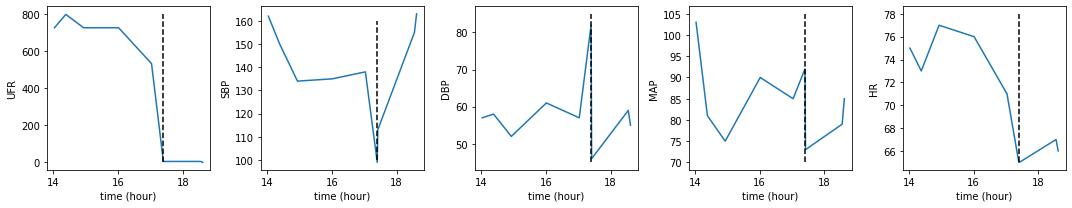

In [11]:
stop_time = 17 + 24.0/60

plt.figure(figsize = (15, 3))

plt.subplot(1, 5, 1)
plt.plot(data_p1_visit1['Time (hour)'], data_p1_visit1['UFR'])
plt.plot([stop_time, stop_time], [0, 800], linestyle = '--', color = 'k')
plt.xlabel('time (hour)')
plt.ylabel('UFR')

plt.subplot(1, 5, 2)
plt.plot(data_p1_visit1['Time (hour)'], data_p1_visit1['SBP'])
plt.plot([stop_time, stop_time], [100, 160], linestyle = '--', color = 'k')
plt.xlabel('time (hour)')
plt.ylabel('SBP')

plt.subplot(1, 5, 3)
plt.plot(data_p1_visit1['Time (hour)'], data_p1_visit1['DBP'])
plt.plot([stop_time, stop_time], [45, 85], linestyle = '--', color = 'k')
plt.xlabel('time (hour)')
plt.ylabel('DBP')

plt.subplot(1, 5, 4)
plt.plot(data_p1_visit1['Time (hour)'], data_p1_visit1['MAP'])
plt.plot([stop_time, stop_time], [70, 105], linestyle = '--', color = 'k')
plt.xlabel('time (hour)')
plt.ylabel('MAP')

plt.subplot(1, 5, 5)
plt.plot(data_p1_visit1['Time (hour)'], data_p1_visit1['HR'])
plt.plot([stop_time, stop_time], [65, 78], linestyle = '--', color = 'k')
plt.xlabel('time (hour)')
plt.ylabel('HR')

plt.tight_layout()
plt.show()

## Plot UFR trends from multiple visits

In [12]:
p1_visit_dates = np.unique(data.loc[(data.index == 'N001'), 'Treatment date'])

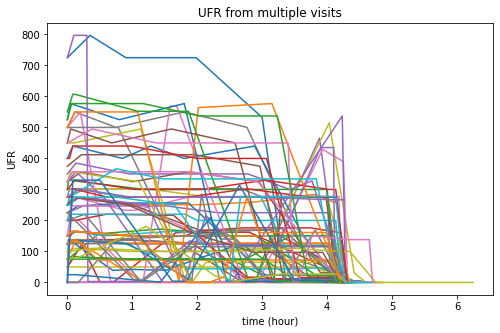

In [13]:
plt.figure(figsize = (8, 5))

for date in p1_visit_dates:
    times = [x.hour + x.minute / 60.0 for x in data.loc[(data.index == 'N001') & (data['Treatment date'] == date), 'Time']]
    times = [t - times[0] for t in times]
    plt.plot(times, data.loc[(data.index == 'N001') & (data['Treatment date'] == date), 'UFR'])

plt.xlabel('time (hour)')
plt.ylabel('UFR')
plt.title('UFR from multiple visits')

plt.show()

## Exercise 5: Show UFR trends from sessions with high initial UFR > 400

## Let's pick some dates to explore further

In [ ]:
def view_dialysis_trend(patient, date):
    local_data = data.loc[(data.index == patient) & (data['Treatment date'] == date), :]
    local_times = [x.hour + x.minute / 60.0 for x in local_data['Time']]
    
    features = ['UFR', 'SBP', 'DBP', 'MAP', 'HR']
    
    plt.figure(figsize = (15, 3))
    
    for i, feature in enumerate(features, start = 1):
        plt.subplot(1, 5, i)
        plt.plot(local_times, local_data[feature])
        plt.xlabel('time (hour)')
        plt.ylabel(feature)
        
    plt.tight_layout()
    plt.show()

## Let's switch to radiotherapy dataset
We fill all missing values with mean for now

In [ ]:
data = pd.read_excel('3011979_datasets.xlsx', sheet_name = 'hcc_rt', header = 0, index_col = 0)
data = data.fillna(data.mean())
data.head()

## With seaborn, we can visualize DataFrame directly

In [ ]:
sns.violinplot(data = data, x = 'sex', y = 'MLD_TPS')

## Use DataFrame's column names to group samples

In [ ]:
sns.violinplot(data = data, x = 'rt_tech', y = 'MLD_TPS', hue = 'sex', split = True)

## Exercise 6: Summarize frequency of patients with different sex and rt_tech

## Linear trends for multiple sample groups

In [ ]:
g = sns.lmplot(data = data, x = 'age', y = 'MLD_TPS', hue = 'rt_tech')